/tmp/ipykernel_1550/3423022807.py:18: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['value'].replace('',pd.np.nan)
/tmp/ipykernel_1550/3423022807.py:19: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['value'].replace(' ',pd.np.nan)


[19:46:50] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2.95660	validation_1-rmse:4.74205
[300]	validation_0-rmse:2.19698	validation_1-rmse:4.11868
[600]	validation_0-rmse:1.63580	validation_1-rmse:3.70826
[900]	validation_0-rmse:1.22183	validation_1-rmse:3.44506
[1200]	validation_0-rmse:0.91767	validation_1-rmse:3.27802
[1500]	validation_0-rmse:0.69549	validation_1-rmse:3.17390
[1800]	validation_0-rmse:0.53475	validation_1-rmse:3.10633
[2100]	validation_0-rmse:0.41764	validation_1-rmse:3.07022
[2400]	validation_0-rmse:0.33183	validation_1-rmse:3.06073
[2623]	validation_0-rmse:0.28591	validation_1-rmse:3.06085


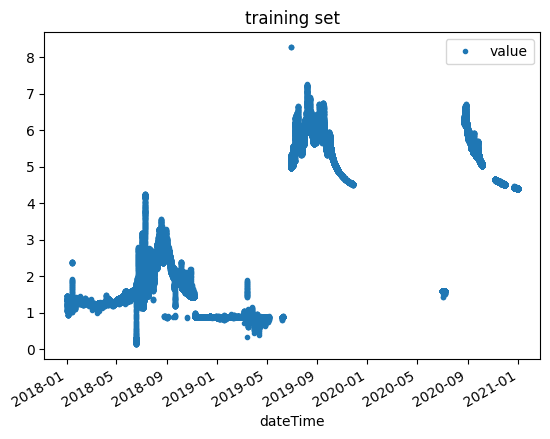

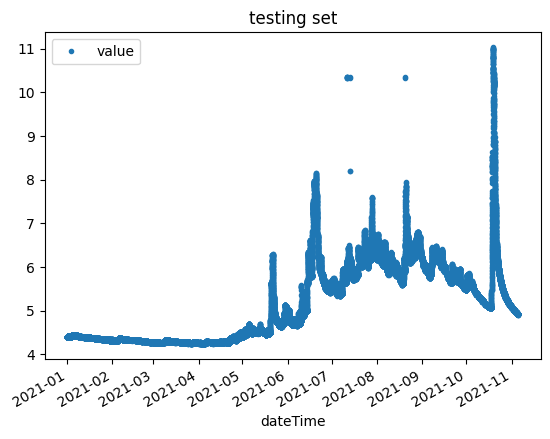

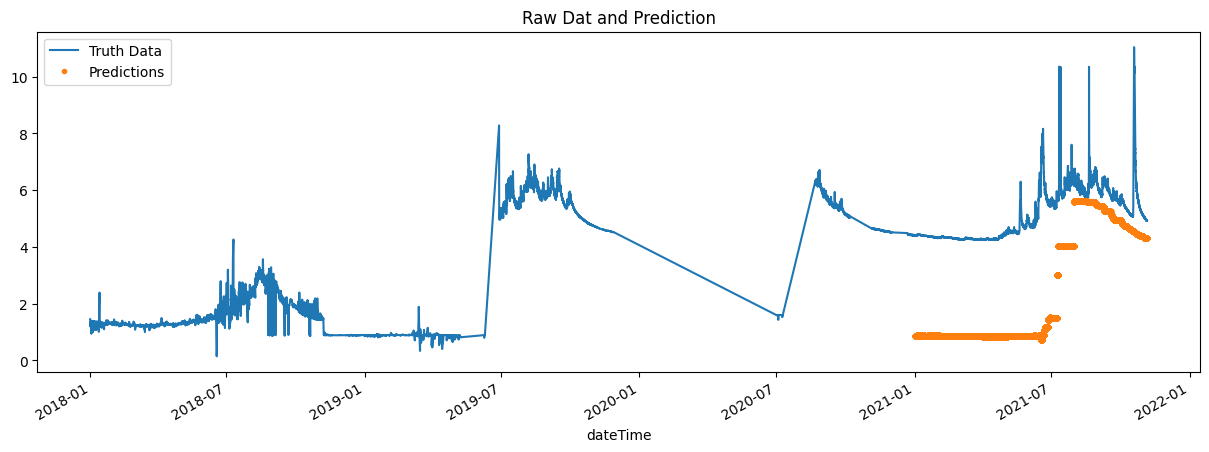

RMSE Score on Test set: 3.06


In [10]:
import calendar
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error


df = pd.read_csv('dipayal_all.csv')

df = df.set_index('dateTime')
df.index = pd.to_datetime(df.index)
#df.plot(style='.',title='Water Level in m')

df['value'] = pd.to_numeric(df['value'], errors='coerce')
df['value'].replace('',pd.np.nan)
df['value'].replace(' ',pd.np.nan)
df['value'] = df['value'].interpolate()

train=df.loc[df.index < '01-01-2021']
test=df.loc[df.index >= '01-01-2021']
train.plot(style='.',title='training set')
test.plot(style='.',title='testing set')
def create_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'value'
X_train = train[FEATURES]
y_train = train[TARGET]
X_test = test[FEATURES]
y_test = test[TARGET]
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=10000,
                       early_stopping_rounds=100,
                       objective='reg:linear',
                       max_depth=4,
                       learning_rate=0.001)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=300)


test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['value']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()
score = np.sqrt(mean_squared_error(test['value'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')



